## AMATH797 PSet1 David Lieberman

In [0]:
#from google.colab import drive
import os
import numpy as np
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import PCA
from PIL import Image
np.random.seed(0)

import scipy
import scipy.io as sio
from scipy.io import loadmat

import matplotlib.pyplot as plt
from matplotlib import offsetbox
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline

#drive.mount('/content/drive')
#cd 'drive/My Drive/2020S_AMATH797/PSet1'
os.chdir(os.path.expanduser(os.sep.join(["/mnt","c","Users","darkg","Desktop", "Homework Scans", "2020S_AMATH797", "PSet1"])))

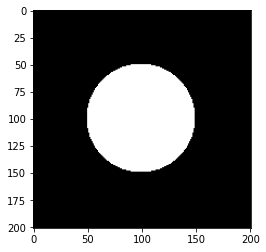

In [0]:
circle = np.array(Image.open("circle.png"))
#circle = circle.astype('float')/255
plt.imshow(circle, cmap = 'gray', vmin=0, vmax=255)

In [0]:
patches = extract_patches_2d(circle, (5, 5))
patches = patches.reshape((38809, 25))
#patches_centered = patches - np.mean(patches[:], axis=0)

circle_pca = PCA(n_components = 3)
circle_pca.fit(patches)
print(circle_pca.explained_variance_ratio_)

[0.95940322 0.01202822 0.01202822]


In [0]:
patches = extract_patches_2d(circle, (5, 5))
patches.shape

(38809, 5, 5)

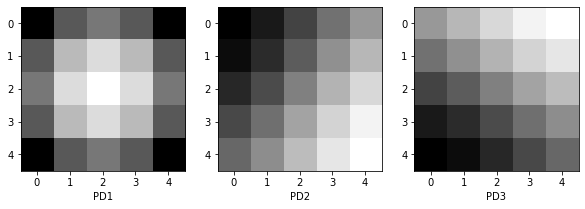

In [0]:
PD = [np.reshape(circle_pca.components_[i], (5,5)) for i in range(3)]

fig = plt.figure(figsize=(10, 10))
for i in range(3):
    fig.add_subplot(1, 3, i + 1)
    plt.xlabel('PD' + str(i + 1))
    plt.imshow(PD[i], cmap = 'gray')

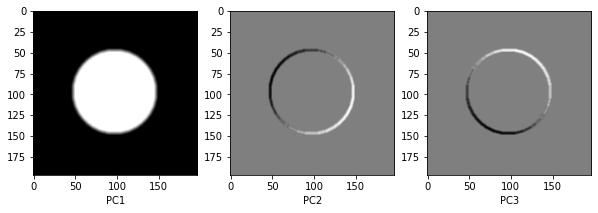

In [0]:
PC = circle_pca.fit_transform(patches)

fig = plt.figure(figsize=(10, 10))
for i in range(3):
    fig.add_subplot(1, 3, i + 1)
    plt.xlabel('PC' + str(i + 1))
    plt.imshow(np.reshape(PC[:, i], ((197, 197))), cmap = 'gray')

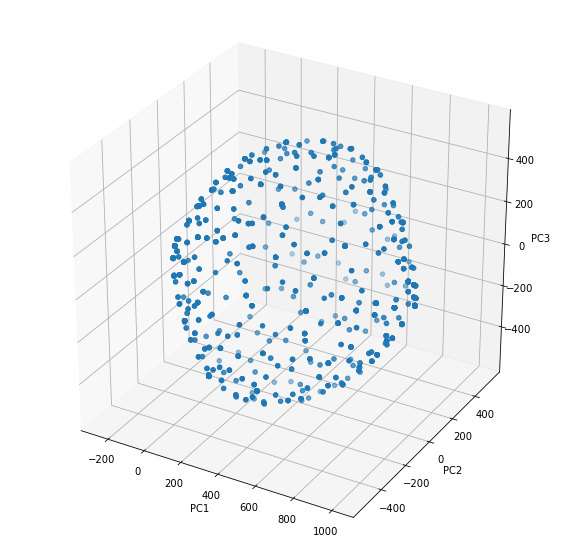

In [0]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection = '3d')
ax.scatter3D(PC[:, 0], PC[:, 1], PC[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

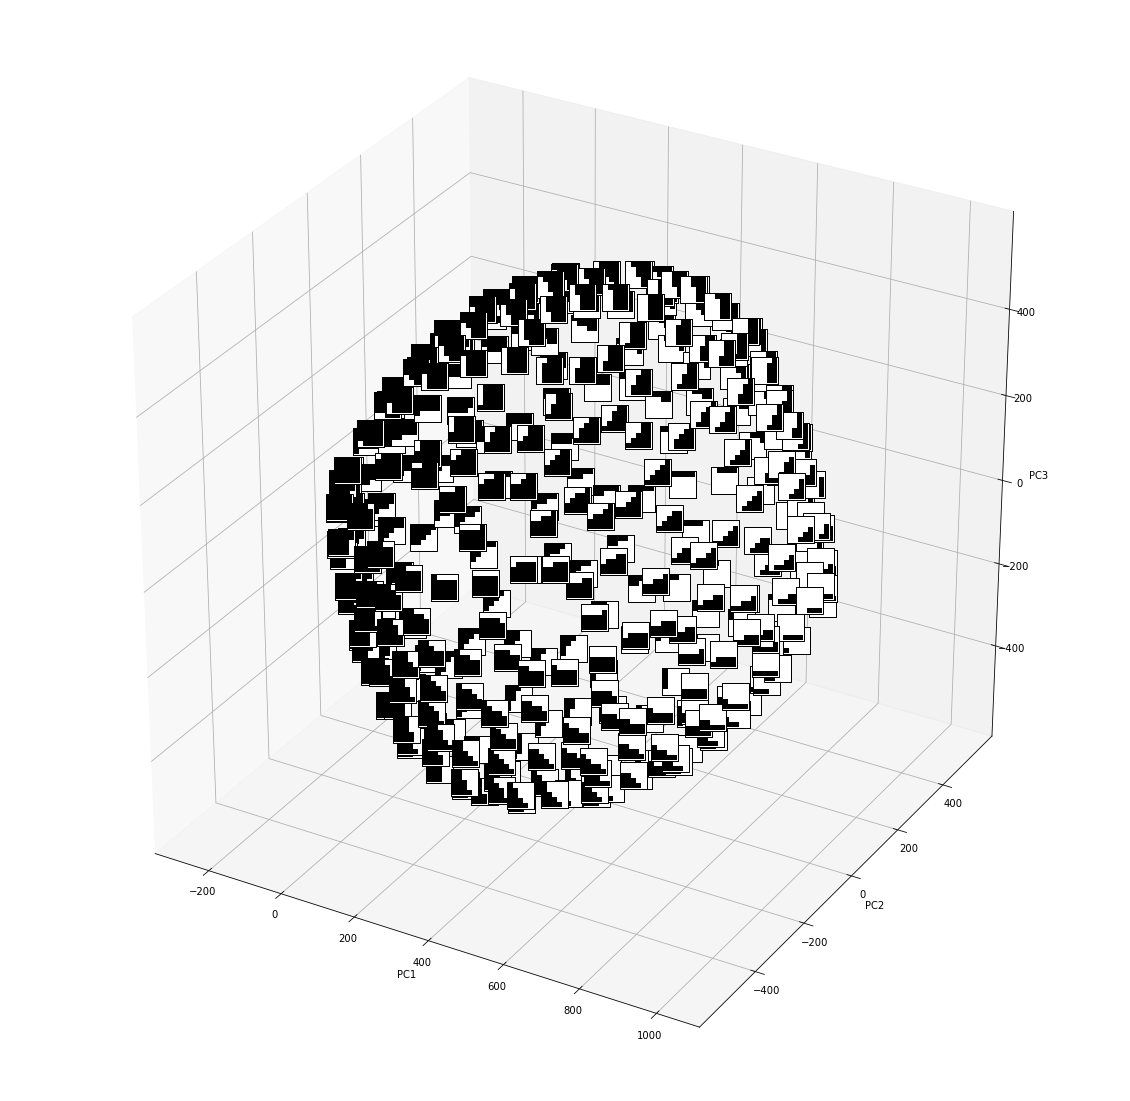

In [0]:
xs = PC[:, 0].flatten()
ys = PC[:, 1].flatten()
zs = PC[:, 2].flatten()

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection=Axes3D.name)
ax.scatter(xs, ys, zs)

ax2 = fig.add_subplot(111, frame_on=False) 
ax2.axis("off")
ax2.axis([0,1,0,1])


def proj(X, ax1, ax2):
    """ From a 3D point in axes ax1, 
        calculate position in 2D in ax2 """
    x,y,z = X
    x2, y2, _ = proj3d.proj_transform(x,y,z, ax1.get_proj())
    return ax2.transData.inverted().transform(ax1.transData.transform((x2, y2)))

def image(ax,arr,xy):
    """ Place an image (arr) as annotation at position xy """
    im = offsetbox.OffsetImage(arr, zoom = 5, cmap='gray', norm=plt.Normalize(0,255))
    im.image.axes = ax
    ab = offsetbox.AnnotationBbox(im, xy, xycoords = 'data', frameon = True, pad = 0.1)
    ax.add_artist(ab)


i = 0
for s in zip(xs,ys,zs):
    x,y = proj(s, ax, ax2)
    image(ax2, np.reshape(patches[i], ((5, 5))), [x,y])
    i += 1

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

We observe that principal component 1 which captures roughly ~96% of the variance of the data seems to differentiate patches based on their color. Principal components 2 and 3, seem to capture directions for moving vertically and horiztonally (respectively), which are axises of symmetry for the circle. These results are exactly those which we would expect.

(346, 358)

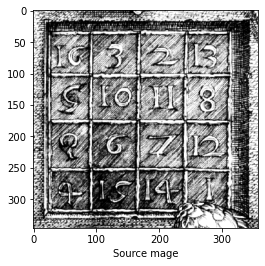

In [0]:
numbers = scipy.io.loadmat('numbers.mat')['mat']
numbers_mean = np.mean(numbers[:], axis=0)
plt.imshow(numbers, cmap = 'gray')
plt.xlabel('Source Image')
numbers.shape

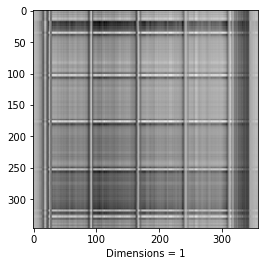

Component-wise Percentage Total Variance: [0.22591042]
Reconstruction Error: 8690.909202650431
Compression Rate: 175.69929078014184


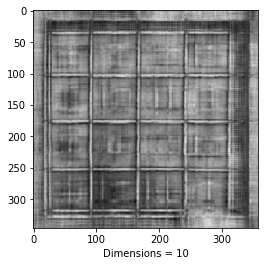

Component-wise Percentage Total Variance: [0.22591042 0.0599177  0.04909906 0.03056869 0.02494228 0.02450543
 0.01909028 0.01847125 0.01619839 0.01573313]
Reconstruction Error: 5788.366782829698
Compression Rate: 17.569929078014184


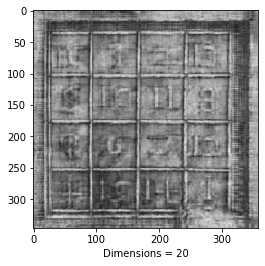

Component-wise Percentage Total Variance: [0.22591042 0.0599177  0.04909906 0.03056869 0.02494228 0.02450543
 0.01909028 0.01847125 0.01619839 0.01573313]
Reconstruction Error: 4501.927216110859
Compression Rate: 8.784964539007092


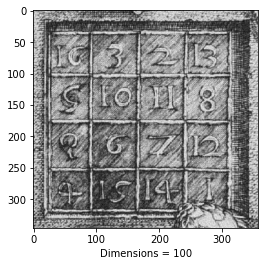

Component-wise Percentage Total Variance: [0.22591042 0.0599177  0.04909906 0.03056869 0.02494228 0.02450543
 0.01909028 0.01847125 0.01619839 0.01573313]
Reconstruction Error: 962.002224382447
Compression Rate: 1.7569929078014184


In [0]:
for i in np.array([1, 10, 20, 100]):
    numbers_pca = PCA(n_components = i)
    numbers_PC = numbers_pca.fit_transform(numbers)
    numbers_reconstruct = numbers_pca.inverse_transform(numbers_PC)
    plt.imshow(numbers_reconstruct, cmap = 'gray')
    plt.xlabel('Dimensions = ' + str(i))
    plt.show()
    print("Component-wise Percentage Total Variance:", numbers_pca.explained_variance_ratio_[:10])
    print("Reconstruction Error:", ((numbers - numbers_reconstruct) ** 2).sum())
    print("Compression Rate:", (346 * 358) / (346 * i + i + i * 358))